# 저항이 없을때 실험결과를 가지고 모델을 학습합니다.

## 저항이 없을떄 실험한 데이터 준비

In [22]:
import pandas as pd
import numpy as np
filepath = './dataset/defult.csv'
defult_df = pd.read_csv(filepath)

defult_Voltage = np.array(defult_df['Voltage'])
defult_Ampare = np.array(defult_Voltage)


In [23]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    defult_Voltage, defult_Ampare, random_state=10)



In [24]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)


### 실험한 데이터 시각화하기

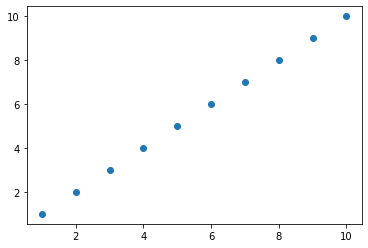

In [25]:
import matplotlib.pyplot as plt

plt.scatter(defult_Voltage, defult_Ampare)
plt.show()

실험해본 데이터를 시각화 해 보았을때 데이터가 매우 선형적인것을 확인해 보실수가 있습니다.
이제 우리는 이 데이터들을 객관적으로 학습시킨후 저항이 없을때 전압에 따른 전류의 값을
예측하는 모델을 구현해 보도록 하겠습니다.

## 저항이 없을떄 직선을 학습하기

### 데이터 분석
과학첵에 따르면 저항이 없을떈 전류의 세기는 전압에 정비례한다라고 서술되어 있습니다.
정비례 관계를 나타내는 함수는 1차함수이므로 우리는 위 직선을 1차함수를 활용하여
단순 선형 회귀분석을 활용하여 학습하도록 하겠습니다.


In [29]:
from sklearn.linear_model import LinearRegression

defult_lr = LinearRegression()

defult_lr.fit(train_input, train_target)

LinearRegression()

### 학습한 직선 그래프로 나타내기

In [30]:
print(defult_lr.coef_, defult_lr.intercept_)

[1.] 0.0


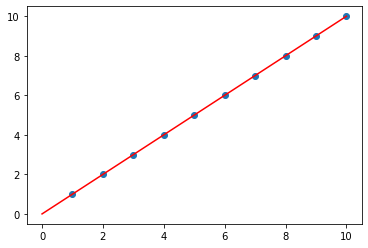

In [34]:
plt.scatter(defult_Voltage, defult_Ampare)
plt.plot([0, 10], [0*defult_lr.coef_ + defult_lr.intercept_, 10*defult_lr.coef_+defult_lr.intercept_], 'r')

plt.show()

저항이 없을때 전류와 전압의 정비례 관계를 완벽하게 학습하였습니다.
이제 저항을 구현해 보도록 하겠습니다.